## **Aprendizagem de Máquina na Classificação da Evasão Segundo Dados Socioeconômicos dos Cursos de Licenciatura do IFNMG - Campus Salinas**

---

Evasão escolar no ensino superior: o objetivo foi desenvolver um modelo utilizando o *Naive Bayes* para classificar a situação do discente, permanência ou evasão, frente aos seus dados socioeconômicos, nos curos de licenciatura do IFNMG-Salinas.


##**Conjunto de dados**

A base de dados construída no trabalho iniciado por Reis (2021) é uma planilha eletrônica composta por 256 amostras de dados relativas às turmas de 2017 e 2018 dos cursos de licenciatura em Ciências Biológicas, Física, Matemática e Química.

Dessas 256 amostras, 135 são de discentes evadidos e 121 de discentes regularmente matriculados (não evadidos). Cada amostra é caracterizada por 23 atributos discretos, nos quais:  
* 22  deles são os atributos de entrada (características)
* 1  atributo de saída (rótulo, situação do discente: evadiu ou  não evadiu).



----

Este notebook foi escrito por Luana Teixeira dos Reis, utilizando a base de dados contruída por {1}, empregando a biblioteca de aprendizagem de máquina máquina scikit learn {2}.


{1} Reis, L. Redes Neurais Artificiais na Identificação da Propensão à Evasão nas Licenciaturas do IFNMG-Salinas. Acesso em: 12 fev 2022.

{2} SCIKIT-LEARN. scikit-learn: Machine Learning in Python. Disponível em: https://scikit-learn.org/stable/index.html. Acesso em: 18 dez 2023.

##***Naive bayes***
----

**Importação de Pacote e módulos necessários**

In [ ]:
#Bibliotecas
from google.colab import files
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from IPython.core.display import warnings
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import io

**Carregando a base de dados**

In [ ]:
#Importando conjuntos e dados já limpo(removidas variáveis descessárias e com dados faltantes)

uploaded = files.upload() # uploaded é um dicionário, sendo a chave o nome do arquivo
data_evasao = pd.read_csv(io.BytesIO(uploaded[list(uploaded.keys())[0]]))

Saving new_data_evasao.csv to new_data_evasao (1).csv


In [ ]:
#Visualizando dados
data_evasao.head(1)

,curso,atv_remunerada,renda_mensal,num_mem_familia,renda_mensal_familia,sit_pai_trabalho,sit_mae_trabalho,ens_fundamental,ens_medio,tempo_concluiu_ens_medio,...,atv_ocup_tempo,meio_informado,faixa_etaria,procedencia,rep_ens_fundamental,rep_ens_medio,esc_pai,esc_mae,deficiencia,Evadiu
0,Ciencias Biologicas,Nao,Nao tenho nenhuma renda mensal.,De 1 a 3 pessoas,"De 1 até 1,5 salário mínimo.",Outra situação,Outra situação,Escola pública municipal,Escola pública federal,Há mais de 5 anos,...,Nenhuma dessas atividades,Internet,De 30 a 39 anos,Zona rural,1 vez,Nenhuma vez,Ensino fundamental completo,Ensino fundamental incompleto,Não apresento nenhum tipo de deficiência,Sim


###**Validação Cruzada**

In [ ]:
CTRL = 50
accuracy_list = []
sensitivity_list = []
specificity_list = []

columns = list(data_evasao.columns)
columns.remove('Evadiu')
columns.append('Tudo')


y = np.array(data_evasao['Evadiu'])

for column in columns:
  print(f'\n{column}')

  if column =='Tudo':
    x = data_evasao.drop(['Evadiu'], axis=1)
  else:
    x = data_evasao.drop(['Evadiu', column], axis=1)
  x2Ord = OneHotEncoder()
  x2Ord.fit(x)

  # reagrupando entradas
  x = x2Ord.transform(x)

  for c in range(CTRL):
    model = MultinomialNB(alpha=1.0) # Inicialização do Modelo

    # Dividir o conjunto de treinamento, separando 10% para validação
    main_x, validation_x, main_y, validation_y = train_test_split(x, y, test_size=0.10)

    # Ajustar o modelo usando os outros 90% dos dados
    model.fit(main_x, main_y)

    # Calculo de acurácia para conjunto de validação:
    validation_est_y = model.predict(validation_x)
    accuracy_list.append(accuracy_score(validation_est_y, validation_y))
    # Calculo de especificidade para conjunto de validação:
    specificity_list.append(classification_report(validation_est_y, validation_y, output_dict = True)['Não']['precision'])
    # Calculo de sensibilidade para conjunto de validação:
    sensitivity_list.append(classification_report(validation_est_y, validation_y, output_dict = True)['Sim']['precision'])

  # Exibir a acurácia, especificidade e sensibilidade média e respectivo desvio padrão
  print(f"A acurácia média do conjunto de validação é de: {sum(accuracy_list)/len(accuracy_list):.4f}")
  print(f"O Desvio Padrão de acurácia do conjunto de validação é de: {np.std(accuracy_list):.4f}")
  print(f"A especificidade média do conjunto de validação é de: {sum(specificity_list)/len(specificity_list):.4f}.")
  print(f"O Desvio Padrão de especificidade do conjunto de validação é de: {np.std(specificity_list):.4f}.")
  print(f"A sensibilidade média do conjunto de validação é de: {sum(sensitivity_list)/len(sensitivity_list):.4f}.")
  print(f"O Desvio Padrão de sensibilidade do conjunto de validação é de: {np.std(sensitivity_list):.4f}.")


curso
A acurácia média do conjunto de validação é de: 0.5792
O Desvio Padrão de acurácia do conjunto de validação é de: 0.0868
A especificidade média do conjunto de validação é de: 0.5623.
O Desvio Padrão de especificidade do conjunto de validação é de: 0.1256.
A sensibilidade média do conjunto de validação é de: 0.5899.
O Desvio Padrão de sensibilidade do conjunto de validação é de: 0.1181.

atv_remunerada
A acurácia média do conjunto de validação é de: 0.6100
O Desvio Padrão de acurácia do conjunto de validação é de: 0.0887
A especificidade média do conjunto de validação é de: 0.5653.
O Desvio Padrão de especificidade do conjunto de validação é de: 0.1318.
A sensibilidade média do conjunto de validação é de: 0.6492.
O Desvio Padrão de sensibilidade do conjunto de validação é de: 0.1318.

renda_mensal
A acurácia média do conjunto de validação é de: 0.5995
O Desvio Padrão de acurácia do conjunto de validação é de: 0.0903
A especificidade média do conjunto de validação é de: 0.5558.
O 

**Análise do conjunto de validação**

--------------- ANÁLISE DO CONJUNTO DE VALIDAÇÃO -------------------

              precision    recall  f1-score   support

         Não       0.53      0.53      0.53        15
         Sim       0.36      0.36      0.36        11

    accuracy                           0.46        26
   macro avg       0.45      0.45      0.45        26
weighted avg       0.46      0.46      0.46        26

A acurácia média do conjunto de validação é de: 0.5913


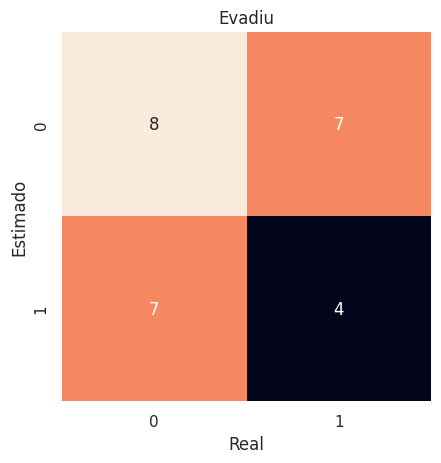

In [ ]:
print('--------------- ANÁLISE DO CONJUNTO DE VALIDAÇÃO -------------------\n')

# Análise do conjunto de treinamento

#print(' Relatório de Classificação')
print(classification_report(validation_est_y, validation_y)) # mostra relatório

acc_train = accuracy_list
print(f"A acurácia média do conjunto de validação é de: {sum(accuracy_list)/len(accuracy_list):.4f}")

mat = confusion_matrix(validation_y, validation_est_y)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.title('Evadiu')
plt.xlabel('Real')
plt.ylabel('Estimado');